In [10]:
import os
import os.path as osp
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import pprint
from wordcloud import WordCloud

In [11]:

with open('/home/mou/DATA/RadGraph/physionet.org/files/radgraph/1.0.0/train.json', 'r') as file:
    data = json.load(file)

In [12]:
# Calculate word statistics for all texts
word_counts = {}
total_words = 0
max_word_length = 0
min_word_length = float('inf')

for report in data.values():
    words = report['text'].split()
    total_words += len(words)
    
    for word in words:
        word_length = len(word)
        word_counts[word] = word_counts.get(word, 0) + 1
        max_word_length = max(max_word_length, word_length)
        min_word_length = min(min_word_length, word_length)
        
unique_words = set(word_counts.keys())
average_word_length = total_words / len(unique_words)

word_statistics = {
    'total_words': total_words,
    'unique_words': len(unique_words),
    'average_word_length': average_word_length,
    'max_word_length': max_word_length,
    'min_word_length': min_word_length
}

In [13]:
print('Word statistics:', word_statistics)

Word statistics: {'total_words': 46554, 'unique_words': 2630, 'average_word_length': 17.701140684410646, 'max_word_length': 78, 'min_word_length': 1}


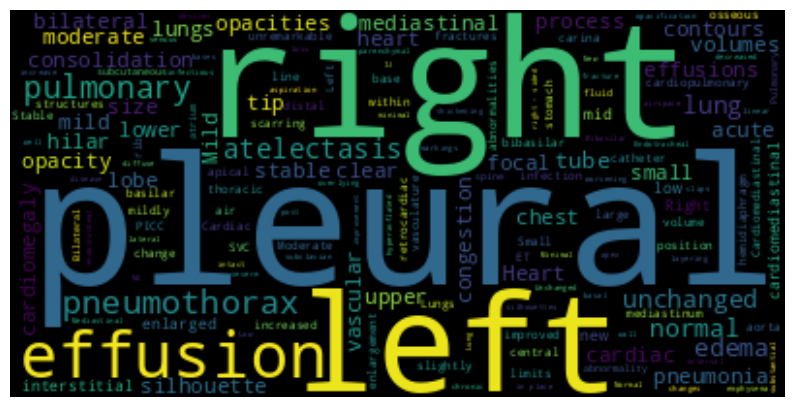

In [14]:
entity_counts = {}
total_entities = 0
max_entity_length = 0
min_entity_length = float('inf')

for report in data.values():
    entities = report['entities']
    for entity in entities.values():
        token = entity['tokens']
        entity_length = len(token)
        total_entities += 1
        entity_counts[token] = entity_counts.get(token, 0) + 1
        max_entity_length = max(max_entity_length, entity_length)
        min_entity_length = min(min_entity_length, entity_length)

unique_entities = set(entity_counts.keys())

average_entity_length = total_entities / len(unique_entities)
entity_statistics = {
    'total_entities': total_entities,
    'unique_entities': len(unique_entities),
    'average_entity_length': average_entity_length,
    'max_entity_length': max_entity_length,
    'min_entity_length': min_entity_length,
}

# Generate word cloud
wordcloud = WordCloud().generate_from_frequencies(entity_counts)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
print('Unique entities', unique_entities)

Unique entities {'milder', 'arteries', 'semi - linear', 'location', 'withdrawn', 'Biapical', 'in position', 'cardiogenic', 'Clear', 'They', 'Linear', 'Improving', 'COPD', 'areas', 'margin', 'elevation', 'haziness', 'stably', '4.3 cm', 'prominence', 'configuration', 'juxta', 'Moderate', 'Hyperinflated', 'supine', 'consolidations', '4.6 cm above', 'obscured', 'congestive', 'nodular', 'collapse', 'artery', 'Prominent', 'Endotracheal', 'complications', '3 cm above', 'positioning', 'Partially imaged', 'prior', 'lobes', 'discrete', 'within', 'predominantly', 'Vasculature', 'local', 'Continued', 'deviation', 'persistent', 'aorta', 'valve', 'dual', 'EFFUSIONS', 'surgical', 'pneumonic', 'composite', 'possible', 'diffuse', 'fat', 'withdrawn 1 cm', 'Cardiomegaly', 'intubated', 'satisfactory', 'mycobacterial', 'Stable', 'superior vena cava', 'monitoring', 'medially', 'to the right', 'side', 'appreciable', 'lumbar', 'ileus', 'Perihilar', 'Widening', 'relatively', 'one - third', 'accessory', 'bronch

In [16]:
print('word statistics:', word_statistics)

word statistics: {'total_words': 46554, 'unique_words': 2630, 'average_word_length': 17.701140684410646, 'max_word_length': 78, 'min_word_length': 1}


In [17]:
print('Entity statistics:', entity_statistics)

Entity statistics: {'total_entities': 12388, 'unique_entities': 1250, 'average_entity_length': 9.9104, 'max_entity_length': 38, 'min_entity_length': 1}
